In [1]:
#import libraries
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from string import punctuation

In [2]:
#load the data from the .csv file
filepath = "datasets/women_clothing_review.csv"
df = pd.read_csv(filepath, index_col=0) #make first column index

df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
# Check count of records
df.count()

Clothing ID                23486
Age                        23486
Title                      19676
Review Text                22641
Rating                     23486
Recommended IND            23486
Positive Feedback Count    23486
Division Name              23472
Department Name            23472
Class Name                 23472
dtype: int64

In [4]:
#Review data values
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [5]:
#Review data types
df.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [6]:
#drop rows with no review text and make new dataframe
revsdf = df.dropna(subset=["Review Text"])
revsdf.count()

Clothing ID                22641
Age                        22641
Title                      19675
Review Text                22641
Rating                     22641
Recommended IND            22641
Positive Feedback Count    22641
Division Name              22628
Department Name            22628
Class Name                 22628
dtype: int64

In [7]:
#initilize function to do sentiment analysis
sid = SentimentIntensityAnalyzer()

In [8]:
#list of english stopwords
eng_stopwords = stopwords.words('english')

In [9]:
#create a function to clean up each review
#then it will analyze and assign a sentiment polarity
def reviewSentiment(review):
    
    #make text lowercase
    review = review.lower()
    
    #tokenize the review
    #tknz_review is a list
    tknz_review = word_tokenize(review)
    
    #remove puntuation
    for token in tknz_review:
        if token in punctuation:
            tknz_review.remove(token)
    
    #empty list to hold "cleaned" tokens
    clean_tokens = []
    
    #remove filler words
    for token in tknz_review:
        if token not in eng_stopwords:
            clean_tokens.append(token)
            
    #put sentence back together with remaining clean words - because polarity requires a list
    clean_review = ' '.join(clean_tokens)
    
    #get the polarity scores dictionary
    sid_rev = sid.polarity_scores(clean_review)
    
    #get sentiment polarity from the "compound" key in the sid_rev dictionary
    r_comp = sid_rev['compound']
    
    #return the sentiment value
    return r_comp

In [10]:
#create a new column to hold sentiment value from function
revsdf['review_sentiment'] = revsdf['Review Text'].apply(reviewSentiment)

<ipython-input-10-3591bb6d3434>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revsdf['review_sentiment'] = revsdf['Review Text'].apply(reviewSentiment)


In [11]:
#Verify sentiment values in new column
revsdf.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,review_sentiment
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.8991
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.9710
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.9062
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.9464
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.9117


In [12]:
revsdf.dtypes

Clothing ID                  int64
Age                          int64
Title                       object
Review Text                 object
Rating                       int64
Recommended IND              int64
Positive Feedback Count      int64
Division Name               object
Department Name             object
Class Name                  object
review_sentiment           float64
dtype: object

In [13]:
#create a function to assign a polarity category to the sentiment
def sentimentCategory(sent_num):
    if sent_num >= 0.6:
        return "strong positive"
    if sent_num >= 0.2:
        return "positive"
    if sent_num <= -0.2:
        return "negative"
    if sent_num <= -0.6:
        return "strong negative"
    else:
        return "neutral"

In [14]:
#create a new column to hold sentiment category
revsdf['sentiment_category'] = revsdf['review_sentiment'].apply(sentimentCategory)

<ipython-input-14-d917dfbfafd7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revsdf['sentiment_category'] = revsdf['review_sentiment'].apply(sentimentCategory)


In [15]:
revsdf.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,review_sentiment,sentiment_category
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.8991,strong positive
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.9710,strong positive
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.9062,strong positive
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.9464,strong positive
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.9117,strong positive


In [16]:
#compare frequency of positive, negative, and neutral reviews
revsdf['sentiment_category'].value_counts()

strong positive    19227
positive            2155
neutral              713
negative             546
Name: sentiment_category, dtype: int64

In [17]:
#review for accuracy of analysis
revsdf['Review Text'].iloc[0]

'Absolutely wonderful - silky and sexy and comfortable'

In [18]:
revsdf['review_sentiment'].iloc[0]

0.8991

In [19]:
#accurate
revsdf['sentiment_category'].iloc[0]

'strong positive'

In [20]:
#review for accuracy of analysis
revsdf['Review Text'].iloc[2]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

In [21]:
revsdf['review_sentiment'].iloc[2]

0.9062

In [22]:
#Not accurate
revsdf['sentiment_category'].iloc[2]

'strong positive'

In [23]:
#Test model: how well does sentiment category match up with rating

#Import additional libraries needed

import seaborn as sns



In [24]:
#create a table of correlation values
revsdf.corr()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,review_sentiment
Clothing ID,1.000000,0.017688,-0.018454,-0.014874,0.044902,0.013479
Age,0.017688,1.000000,0.029962,0.034208,0.040850,0.002924
Rating,-0.018454,0.029962,1.000000,0.792568,-0.060984,0.395330
Recommended IND,-0.014874,0.034208,0.792568,1.000000,-0.065923,0.354334
Positive Feedback Count,0.044902,0.040850,-0.060984,-0.065923,1.000000,-0.010948
review_sentiment,0.013479,0.002924,0.395330,0.354334,-0.010948,1.000000


<AxesSubplot:>

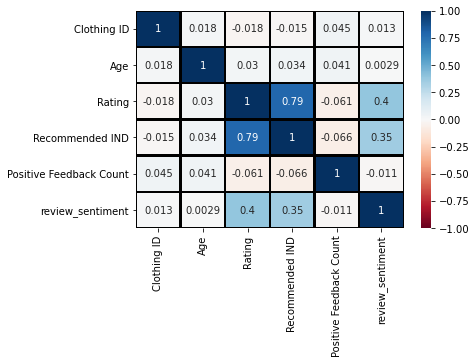

In [25]:
#show correlation of stats via heatmap
#Some correlation between rating and review sentiment, but not as much as we might like to see
#Ditto for Recommended IND and review sentiment
#No correlation between Positive Feedback Count and review sentiment

corr = revsdf.corr()

sns.heatmap(corr,cmap="RdBu", vmin=-1, annot=True, linewidths=1.5, linecolor='black')

In [26]:
# Change Stopwords to see if it improves correlation - take out "but" from stopwords list
new_stopwords = set(stopwords.words('english')) - {'but'}

In [27]:
#create a function to clean up each review
#then it will analyze and assign a sentiment polarity
def reviewSentimentNew(review):
    
    #make text lowercase
    review = review.lower()
    
    #tokenize the review
    #tknz_review is a list
    tknz_review = word_tokenize(review)
    
    #remove puntuation
    for token in tknz_review:
        if token in punctuation:
            tknz_review.remove(token)
    
    #empty list to hold "cleaned" tokens
    clean_tokens = []
    
    #remove filler words
    for token in tknz_review:
        if token not in new_stopwords:
            clean_tokens.append(token)
            
    #put sentence back together with remaining clean words - because polarity requires a list
    clean_review = ' '.join(clean_tokens)
    
    #get the polarity scores dictionary
    sid_rev = sid.polarity_scores(clean_review)
    
    #get sentiment polarity from the "compound" key in the sid_rev dictionary
    r_comp = sid_rev['compound']
    
    #return the sentiment value
    return r_comp

In [28]:
#create a new column to hold sentiment value from function
revsdf['review_sentiment_new'] = revsdf['Review Text'].apply(reviewSentimentNew)

<ipython-input-28-87a83d4315fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revsdf['review_sentiment_new'] = revsdf['Review Text'].apply(reviewSentimentNew)


In [29]:
#Verify new sentiment values in new column
revsdf.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,review_sentiment,sentiment_category,review_sentiment_new
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.8991,strong positive,0.8991
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.9710,strong positive,0.9710
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.9062,strong positive,0.9398
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.9464,strong positive,0.4805
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.9117,strong positive,0.9117


In [30]:
#create a new column to hold sentiment category
revsdf['sentiment_category_new'] = revsdf['review_sentiment_new'].apply(sentimentCategory)

<ipython-input-30-31f730d44977>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revsdf['sentiment_category_new'] = revsdf['review_sentiment_new'].apply(sentimentCategory)


In [31]:
revsdf.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,review_sentiment,sentiment_category,review_sentiment_new,sentiment_category_new
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.8991,strong positive,0.8991,strong positive
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.9710,strong positive,0.9710,strong positive
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.9062,strong positive,0.9398,strong positive
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.9464,strong positive,0.4805,positive
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.9117,strong positive,0.9117,strong positive


In [32]:
#compare frequency of positive, negative, and neutral reviews
revsdf['sentiment_category_new'].value_counts()

strong positive    18530
positive            2375
neutral              924
negative             812
Name: sentiment_category_new, dtype: int64

In [33]:
#review for accuracy of analysis
revsdf['Review Text'].iloc[2]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

In [34]:
revsdf['review_sentiment_new'].iloc[2]

0.9398

In [35]:
#Not accurate
revsdf['sentiment_category_new'].iloc[2]

'strong positive'

In [36]:
#create a table of correlation values
revsdf.corr()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,review_sentiment,review_sentiment_new
Clothing ID,1.000000,0.017688,-0.018454,-0.014874,0.044902,0.013479,0.010541
Age,0.017688,1.000000,0.029962,0.034208,0.040850,0.002924,0.004432
Rating,-0.018454,0.029962,1.000000,0.792568,-0.060984,0.395330,0.407272
Recommended IND,-0.014874,0.034208,0.792568,1.000000,-0.065923,0.354334,0.368134
Positive Feedback Count,0.044902,0.040850,-0.060984,-0.065923,1.000000,-0.010948,-0.012587
review_sentiment,0.013479,0.002924,0.395330,0.354334,-0.010948,1.000000,0.919833
review_sentiment_new,0.010541,0.004432,0.407272,0.368134,-0.012587,0.919833,1.000000


<AxesSubplot:>

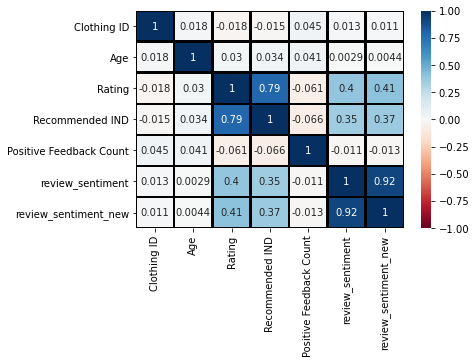

In [37]:
#show correlation of stats via heatmap
#marginal improvement in correlation for new

corr = revsdf.corr()

sns.heatmap(corr,cmap="RdBu", vmin=-1, annot=True, linewidths=1.5, linecolor='black')